In [62]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df = pd.read_csv('./aftercalving.csv',sep=',')

In [64]:
df

,cow,days,TP,ALB,BUN,TCHO,GOT,GGT,Ca,IP,GLU,NH3,NEFA,BHB
0,1,64,7.8,2.9,5.1,103,69,20,8.7,6.5,53,113,79,405.0
1,2,83,6.9,2.9,7.3,75,42,17,9.3,5.9,65,143,105,288.8
2,3,63,6.2,3.0,4.8,87,38,12,8.3,7.0,62,92,77,700.0
3,4,99,7.2,3.2,12.3,76,43,22,9.5,6.9,63,77,78,291.4
4,5,53,7.3,3.0,3.9,94,50,7,8.6,5.3,62,105,213,157.0
5,6,56,7.0,3.4,5.0,174,50,34,9.6,6.3,67,70,84,581.0
6,7,67,7.3,2.9,5.1,94,40,6,8.9,6.4,72,80,47,320.0
7,8,42,7.9,3.8,7.0,118,59,63,9.7,6.5,72,110,31,286.0
8,9,78,6.9,3.1,8.1,82,44,24,9.0,6.9,64,113,73,447.2
9,10,71,7.6,3.6,4.6,77,133,6,9.6,5.7,69,110,273,451.0


In [65]:
df_tr = df

In [66]:
#Standardize
#Calculate the z score of each value in the sample, 
#relative to the sample mean and standard deviation.
clmns = ['days','TP','ALB','BUN','TCHO','GOT', 'GGT', 'Ca','IP','GLU','NH3', 'NEFA','BHB']
df_tr_std = stats.zscore(df_tr[clmns])

In [67]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_tr_std)
labels = kmeans.labels_


In [68]:
df_tr['clusters'] = labels

In [69]:
clmns.extend(['clusters'])


In [72]:
mean = df_tr[clmns].groupby(['clusters']).mean()

In [80]:
std = df_tr[clmns].groupby(['clusters']).std()


In [81]:
std.to_csv('./std3.csv')

In [88]:
df_tr.to_csv('./afterclust.csv')

Text(27.4851,0.5,'NH3')

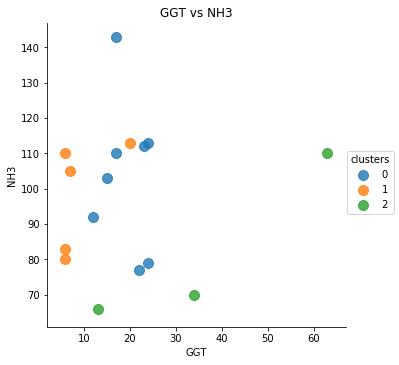

In [79]:
#Scatter plot of Wattage and Duration
ax = sns.lmplot('GGT', 'NH3', 
          data=df_tr, 
         fit_reg=False, 
        hue="clusters",  
       scatter_kws={"marker": "D", 
                   "s": 100})


plt.title('GGT vs NH3')
plt.xlabel('GGT')
plt.ylabel('NH3')


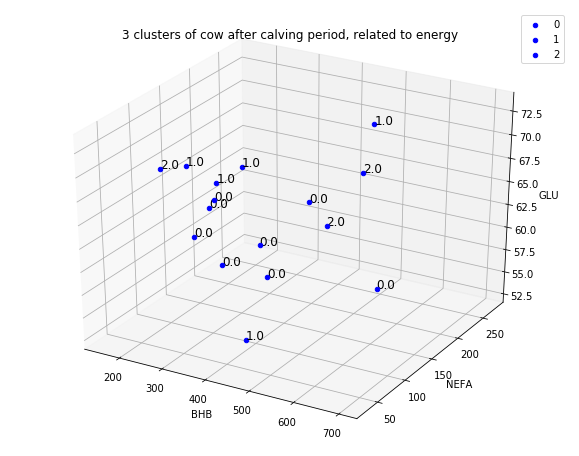

In [94]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111,projection='3d')

for i in range(len(df_tr)):
    x, y, z = df_tr.iloc[i]['BHB'], df_tr.iloc[i]['NEFA'], df_tr.iloc[i]['GLU']
    ax1.scatter(x, y, z, c=['blue'])
    #now that you have the coordinates you can apply whatever text you need. I'm 
    #assuming you want the index, but you could also pass a column name if needed
    ax1.text(x, y, z, '{0}'.format(df_tr.iloc[i]['clusters']), size=12)

ax1.set_xlabel('BHB')
ax1.set_ylabel('NEFA')
ax1.set_zlabel('GLU')   

plt.title('3 clusters of cow after calving period, related to energy')    
ax1.legend('012')
plt.show()